## Import dataset from kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [02:05<00:00, 23.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


### Importing modules

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import glob as gb
import cv2
import matplotlib.pyplot as plt


#### Training section


In [4]:
train = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [34]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.0,
    height_shift_range = 0.0,
    shear_range = 0.0,
    vertical_flip = True,
    rescale = 1/255,
    preprocessing_function =None,
    zoom_range = 0.1
).flow_from_directory(
    train,
    target_size = (size,size),
    batch_size = 164,
    class_mode = "categorical",
    color_mode="rgb",
    subset="training",
    shuffle=True

)

Found 70295 images belonging to 38 classes.


In [25]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

#### Displaying images of dataset

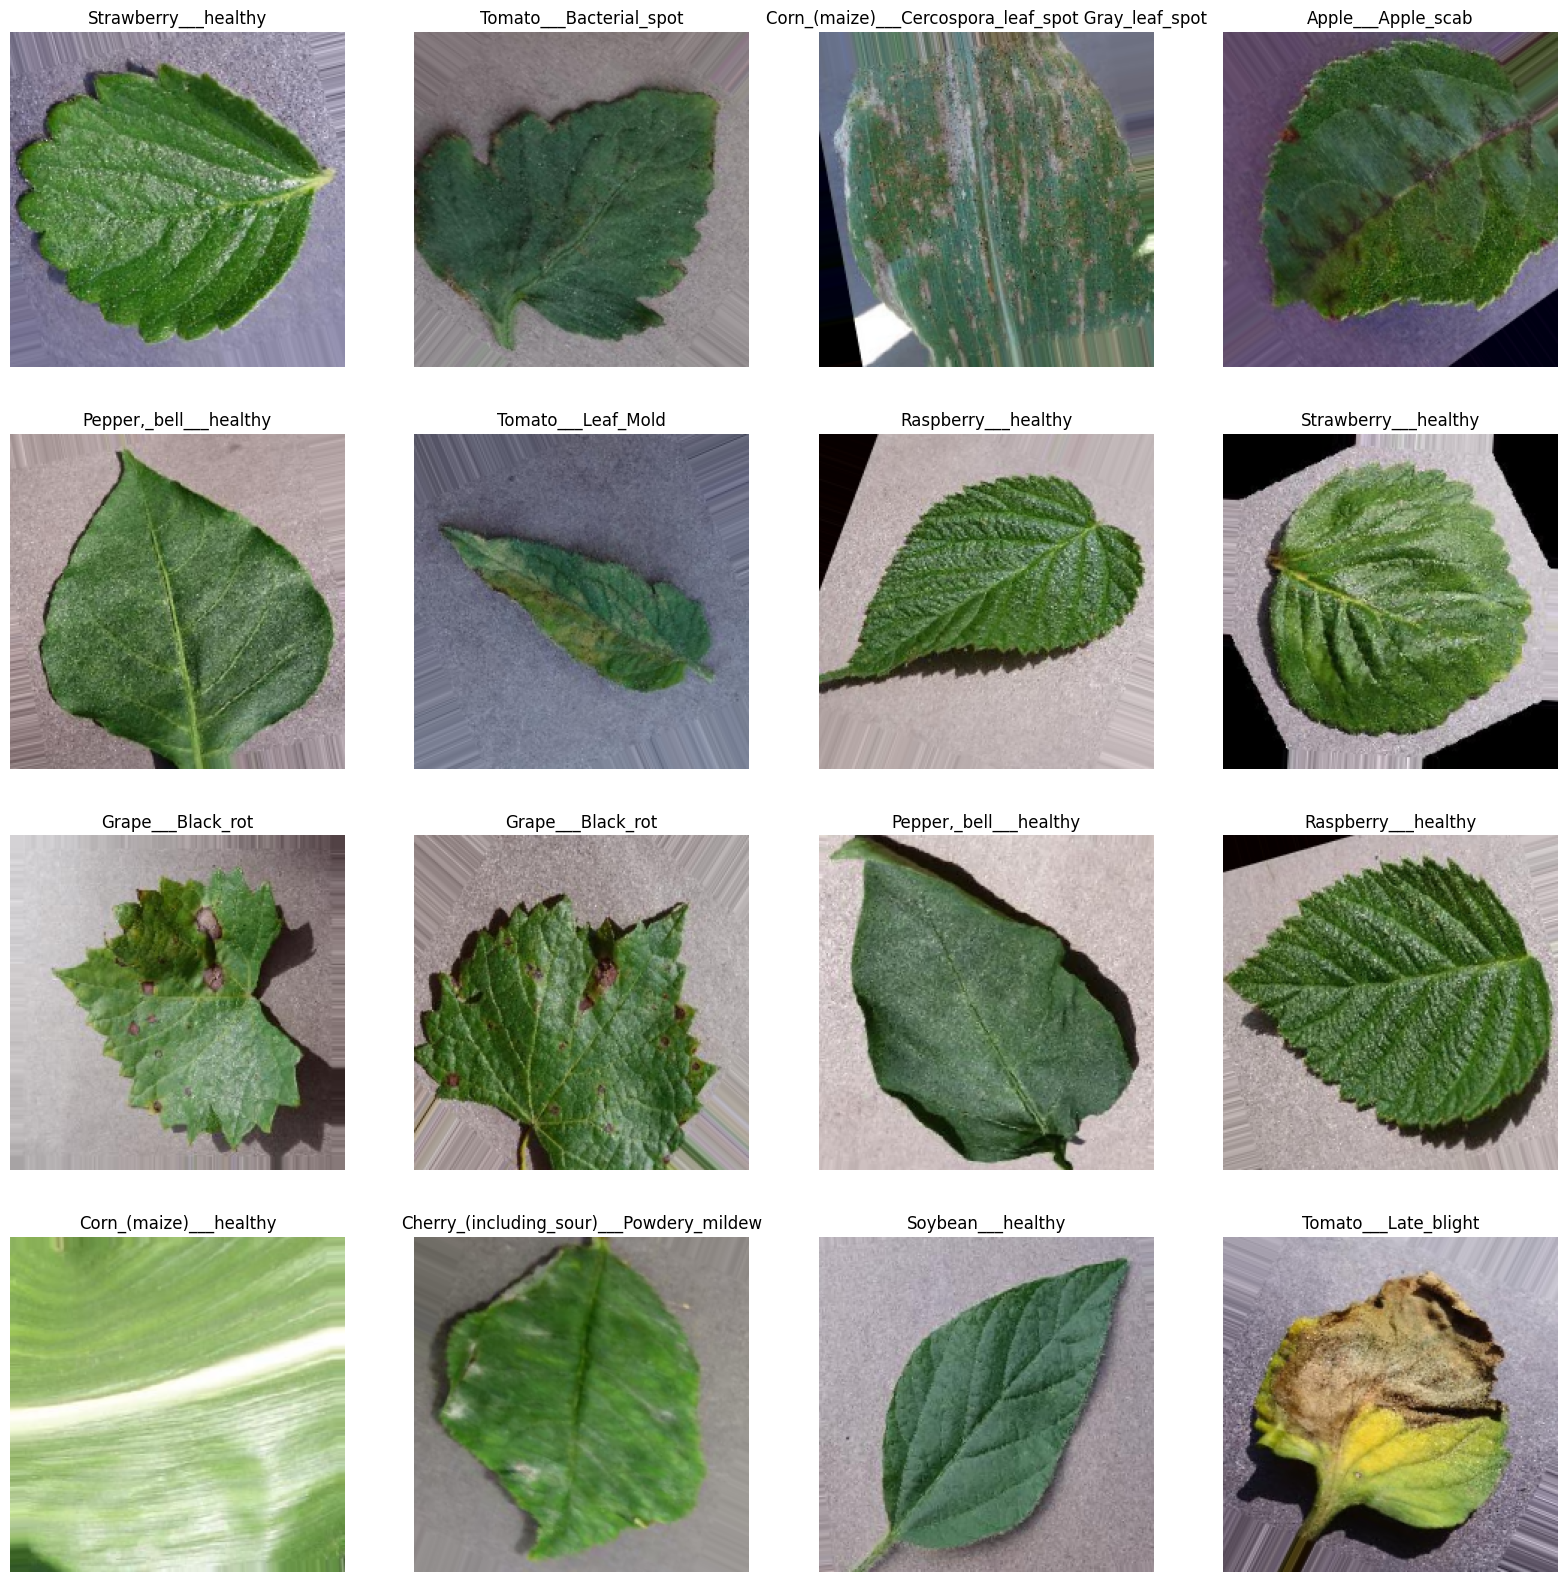

In [26]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
        plt.axis('off')
    plt.show()
    break


####  Validation section

In [27]:
valid = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [19]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(size, size),
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=False
  )

Found 1742 images belonging to 38 classes.


In [28]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None
).flow_from_directory(test,
    batch_size=164,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode = 'categorical',
    shuffle = False
    )

Found 17572 images belonging to 38 classes.


In [29]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

# WEEK - 2


In [35]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=7,strides=1,padding='same',
                              activation='relu',name="Conv1",input_shape=(224,224,3)))

model.add(keras.layers.MaxPooling2D(pool_size=2,name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5,strides=1,padding='same',
                              activation='relu',name="Conv2"))

model.add(keras.layers.MaxPooling2D(pool_size=2,name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3,strides=1,padding='same',
                              activation='relu',name="Conv3"))

model.add(keras.layers.MaxPooling2D(pool_size=2,name="Pool3"))


model.add(keras.layers.Conv2D(filters=256, kernel_size=3,strides=1,padding='same',
                              activation='relu',name="Conv4"))

model.add(keras.layers.MaxPooling2D(pool_size=2,name="Pool4"))


# Flattening

model.add(keras.layers.Flatten(name="Flatten1"))

model.add(keras.layers.Dense(128,activation='relu',name="Dense1"))

tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64,activation='relu',name="Dense2"))

tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38,activation='softmax',name="Output"))

print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool4 (MaxPooling2D)                 │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,858,406 (26.16 MB)

 Trainable params: 6,858,406 (26.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [39]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='var_loss',patience=15,restore_best_weights=True,mode='min')

model_checkpoint = ModelCheckpoint('bestmodel.keras',monitor='var_loss',save_best_only=True)

model_reduceLRonPlateau = ReduceLROnPlateau(monitor='var_loss',factor=0.1,patience=15,min_lr=0.00001)

callbacks = [early_stopping,model_checkpoint,model_reduceLRonPlateau]

In [40]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','precision','recall'])

In [41]:
history = model.fit(train_generator,epochs=5,validation_data=valid_generator,callbacks=callbacks)

Epoch 1/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.7217 - loss: 0.9232 - precision: 0.8278 - recall: 0.6260 - val_accuracy: 0.8255 - val_loss: 0.5499 - val_precision: 0.8722 - val_recall: 0.7721 - learning_rate: 0.0010
Epoch 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `var_loss` which is not available. Available metrics are: accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with var_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `var_loss` which is not available. Available metrics are: accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall,learning_rate.
  callback.on_epoch_end(epoch, logs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 866s 2s/step - accuracy: 0.8521 - loss: 0.4618 - precision: 0.8924 - recall: 0.8160 - val_accuracy: 0.8697 - val_loss: 0.3940 - val_precision: 0.9010 - val_recall: 0.8462 - learning_rate: 0.0010
Epoch 3/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 922s 2s/step - accuracy: 0.8862 - loss: 0.3494 - precision: 0.9134 - recall: 0.8635 - val_accuracy: 0.8370 - val_loss: 0.5206 - val_precision: 0.8656 - val_recall: 0.8134 - learning_rate: 0.0010
Epoch 4/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 851s 2s/step - accuracy: 0.9133 - loss: 0.2629 - precision: 0.9314 - recall: 0.8988 - val_accuracy: 0.9214 - val_loss: 0.2368 - val_precision: 0.9363 - val_recall: 0.9116 - learning_rate: 0.0010
Epoch 5/5
429/429 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.9272 - loss: 0.2164 - precision: 0.9397 - recall: 0.9168 - val_accuracy: 0.9024 - val_loss: 0.3087 - val_precision: 0.9199 - val_recall: 0.8904 - learning_rate: 0.0010


In [42]:
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_rcall = history.history['val_recall']

recall = history.history['recall']
val_rcall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1,len(loss)+1)

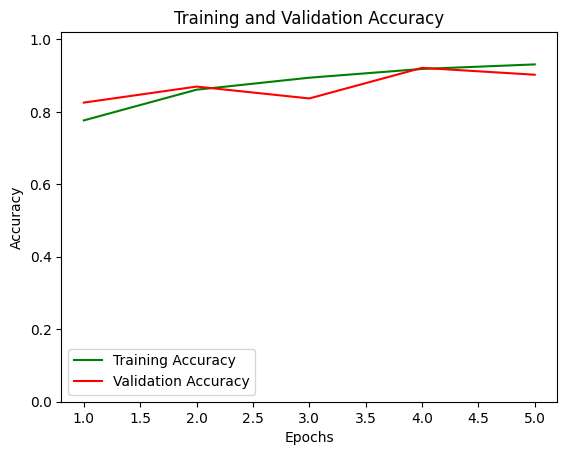

In [43]:
plt.plot(epochs,acc,color='green',label="Training Accuracy")
plt.plot(epochs,val_acc,color='red',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [44]:
model_evaluation = model.evaluate(test_generator)
print("loss : ",model_evaluation[0])
print("accuracy : ",model_evaluation[1])
print("precision : ",model_evaluation[2])
print("recall : ",model_evaluation[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 386ms/step - accuracy: 0.8762 - loss: 0.4081 - precision: 0.8924 - recall: 0.8641
loss :  0.3281182050704956
accuracy :  0.8968244791030884
precision :  0.9134519696235657
recall :  0.8853289484977722


In [45]:
#saving the model...

model.save("cnn_model.keras")